In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
# keras를 이용한 방법
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

[과제]
- 모델 구성
- model compile
- 훈련 검증 : 1000개 샘플을 검증세트로 사용
- 학습 : epochs = 20, batch_size = 512
- 훈련과정 시각화
- 적합한 epochs 확인

In [ ]:
# 모델 구성

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 1000개를 검증데이터셋으로 활용

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 학습

history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 30ms/step - loss: 2.4879 - accuracy: 0.5307 - val_loss: 1.6290 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3595 - accuracy: 0.7154 - val_loss: 1.2734 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0230 - accuracy: 0.7765 - val_loss: 1.1193 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8024 - accuracy: 0.8274 - val_loss: 1.0122 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6309 - accuracy: 0.8686 - val_loss: 0.9540 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5018 - accuracy: 0.8940 - val_loss: 0.9083 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4009 - accuracy: 0.9158 - val_loss: 0.8927 - val_accuracy: 0.8170
Epoch 8/20
16

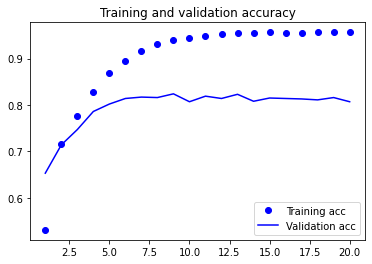

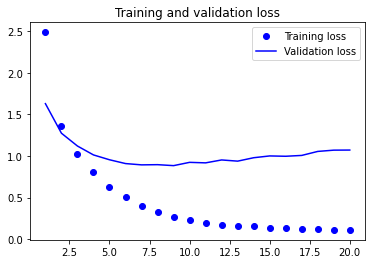

In [ ]:
#시각화 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# epochs 9 이후부터 val_acc 가 낮아지므로 epoch 9로 학습

model_9 = Sequential()
model_9.add(Dense(64, activation = 'relu', input_shape = (10000,)))
model_9.add(Dense(64, activation = 'relu'))
model_9.add(Dense(46, activation = 'softmax'))

model_9.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_9 = model_9.fit(partial_x_train,partial_y_train,
                        epochs = 9,
                        batch_size = 512,
                        validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.7823 - accuracy: 0.4959 - val_loss: 1.8425 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5051 - accuracy: 0.6968 - val_loss: 1.3611 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.1039 - accuracy: 0.7638 - val_loss: 1.1671 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8550 - accuracy: 0.8172 - val_loss: 1.0360 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6710 - accuracy: 0.8577 - val_loss: 0.9706 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5355 - accuracy: 0.8929 - val_loss: 0.9277 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4281 - accuracy: 0.9128 - val_loss: 0.8978 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [ ]:
model_9.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9825 - accuracy: 0.7925


[0.9824634194374084, 0.7925200462341309]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6287 - acc: 0.3400
Epoch 1: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 31s 403ms/step - loss: 2.6287 - acc: 0.3400 - val_loss: 2.4112 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.2678 - acc: 0.3995
Epoch 2: val_acc improved from 0.36198 to 0.48442, saving model to best_model.h5
71/71 [==============================] - 29s 405ms/step - loss: 2.2678 - acc: 0.3995 - val_loss: 2.1840 - val_acc: 0.4844
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 2.0336 - acc: 0.4894
Epoch 3: val_acc improved from 0.48442 to 0.50223, saving model to best_model.h5
71/71 [==============================] - 28s 398ms/step - loss: 2.0336 - acc: 0.4894 - val_loss: 1.9683 - val_acc: 0.5022
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.8320 - acc: 0.5226
Epoch 4: val_acc improved from 0.50223

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 33ms/step - loss: 1.1983 - acc: 0.7204

 테스트 정확도: 0.7204


In [ ]:
#시각화 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
